<center><h1>Homework 1: K-Nearest Neighbor</h1></center>
<br>
<center><font size="4">Vertebral Column Data</font></center>
<center><font size="3"> Zachary J Henning</font></center>
<center><font size="3"> Github: zackhenny</font></center>
<center><font size="3"> USC ID: 7395353238</font></center>

### (a) Download Data

Package imports

In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn 
import scipy
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.neighbors import DistanceMetric



Get the Vertebral Column Data Set

In [128]:
path = '../02 - data/HW1/vertebral+column/column_2C.dat'

df = pd.read_csv(path, delimiter='\s')
col_names = ['p_incidence', 
             'p_tilt', 
             'll_angle', 
             's_slope', 
             'p_radius', 
             'degree_spondylolisthesis',
             'Class']
df.columns = col_names
bin_class = {'AB':1, 'NO':0}
df.Class = [bin_class[item] for item in df.Class]
df.head()

/var/folders/l2/cy38m1l53pz09nlcj3y7_k5m0000gp/T/ipykernel_11202/2516005210.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(path, delimiter='\s')


,p_incidence,p_tilt,ll_angle,s_slope,p_radius,degree_spondylolisthesis,Class
0,39.06,10.06,25.02,29.00,114.41,4.56,1
1,68.83,22.22,50.09,46.61,105.99,-3.53,1
2,69.30,24.65,44.31,44.64,101.87,11.21,1
3,49.71,9.65,28.32,40.06,108.17,7.92,1
4,40.25,13.92,25.12,26.33,130.33,2.23,1


### (b) Pre-Processing and Exploratory Data Analysis

#### i. Scatterplots

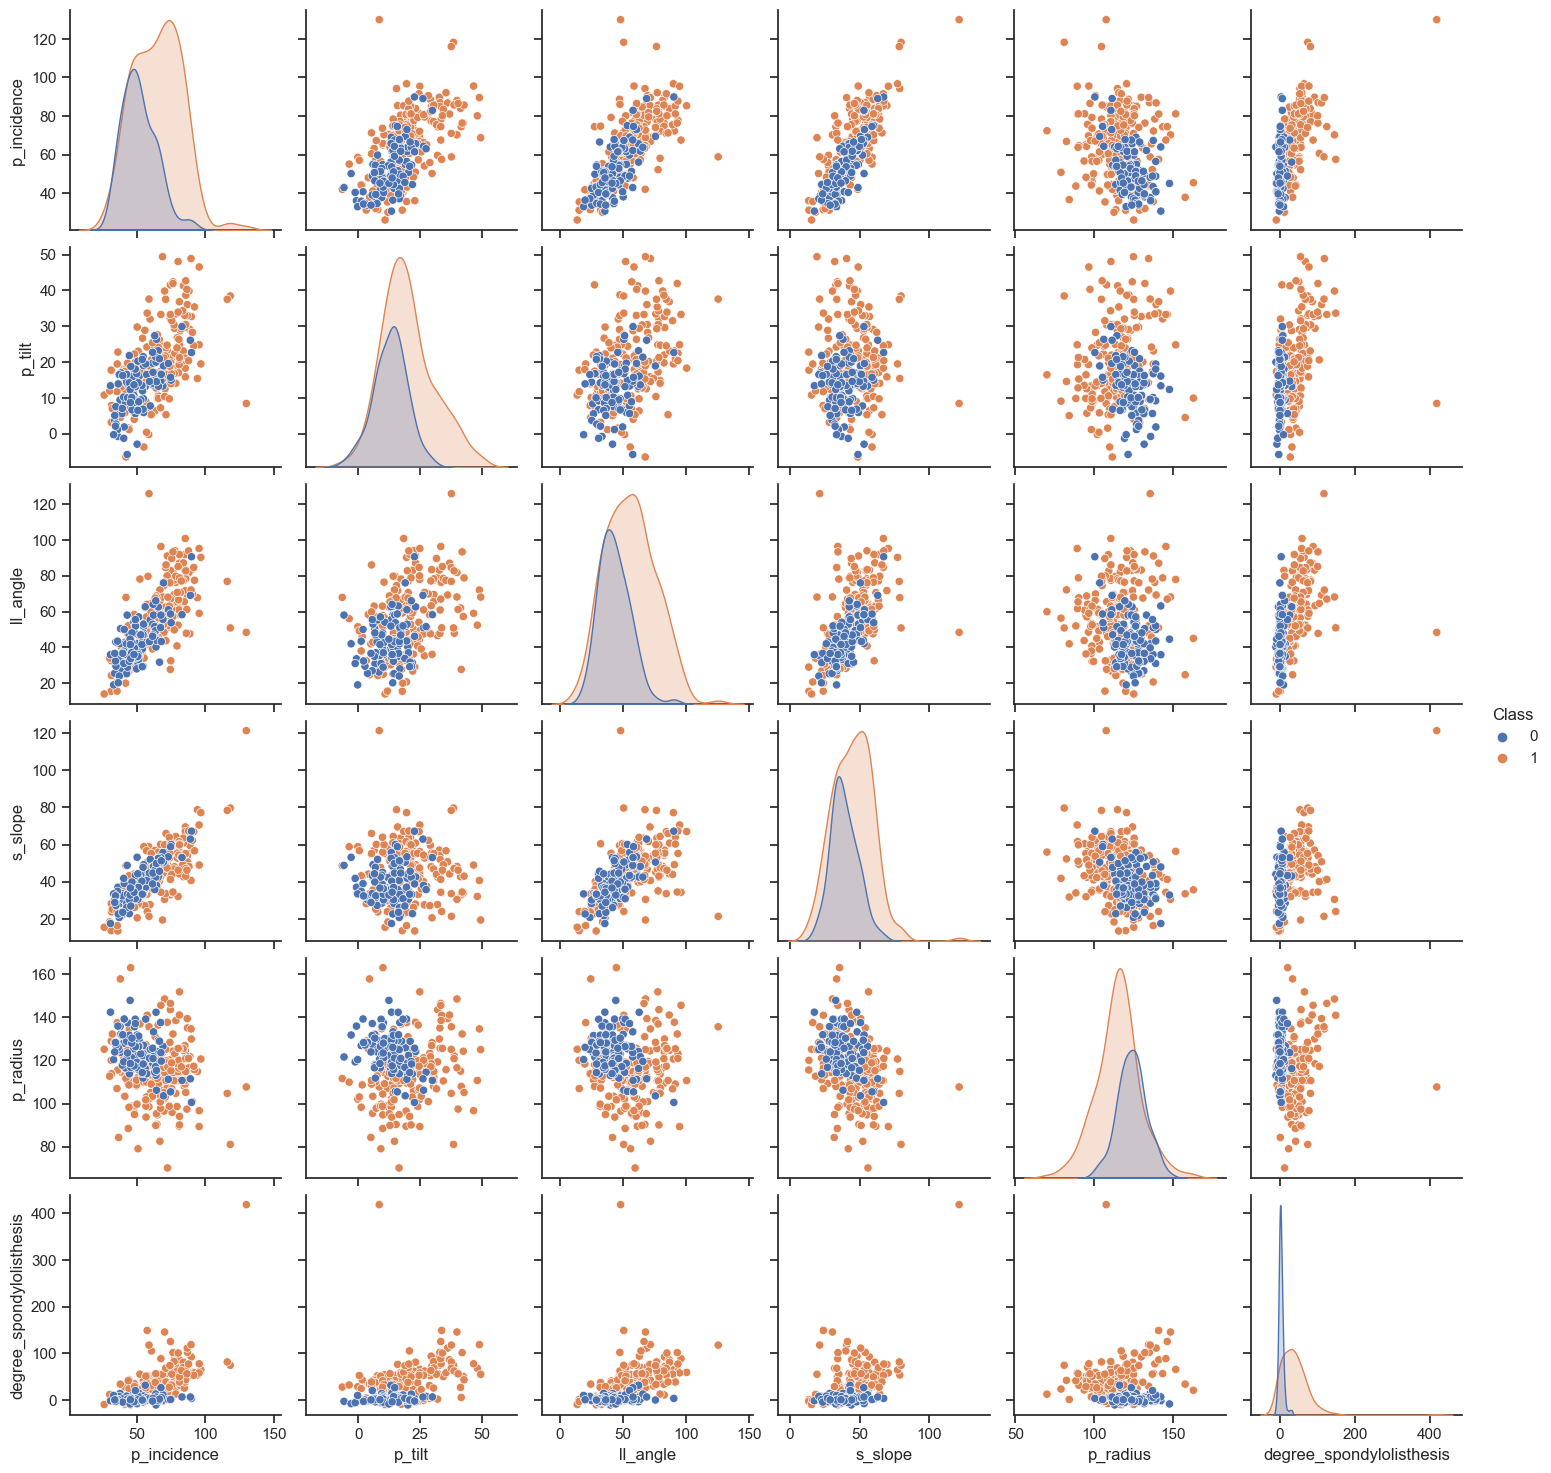

In [129]:
sns.set_theme(style="ticks")
m = sns.pairplot(df, hue="Class")


#### ii. Boxplots

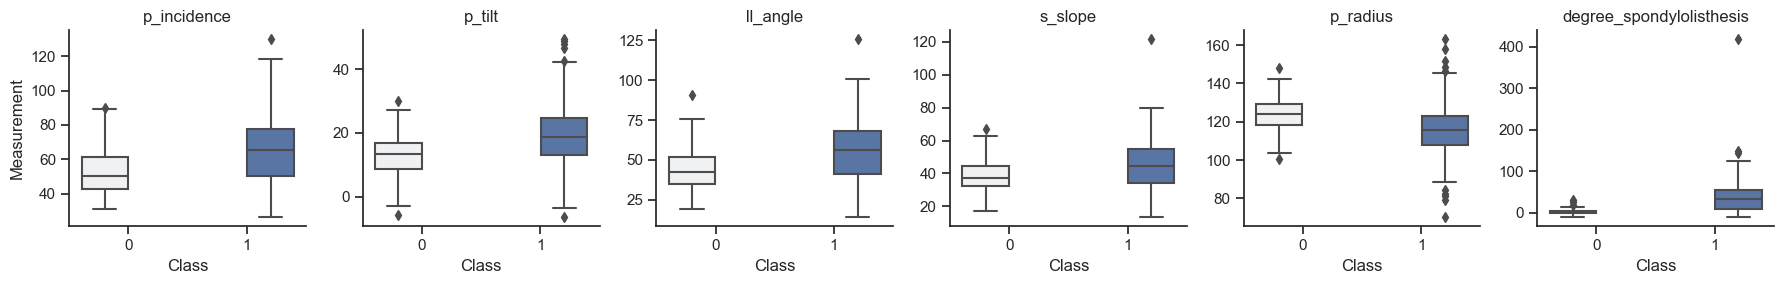

In [130]:
g = sns.FacetGrid(df.melt(id_vars='Class'), col='variable', sharey=False)
g.map_dataframe(sns.boxplot, x='Class', y='value', hue='Class')
g.set_axis_labels('Class', 'Measurement')
g.set_titles(col_template="{col_name}")


#### iii. Split Data Set

In [131]:
class_0_data = df[df['Class'] == 0]
class_1_data = df[df['Class'] == 1]

training_set = pd.concat([class_0_data.head(70), class_1_data.head(140)])

test_set = df.drop(training_set.index)


### (c) Classification

#### i. Euclidean Metric

In [132]:
X_train = training_set.drop(columns = 'Class', axis=1)
y_train = training_set['Class']

k=2
knn = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=2)

#### ii. Test Data

In [133]:

X_test = test_set.drop(columns='Class', axis=1)
y_test = test_set['Class']

y_pred = knn.predict(X_test)



Best k*: 4
Best Test Error: 0.06060606060606055
Confusion Matrix:
[[25  5]
 [ 1 68]]
Precision: 0.9315068493150684
Recall: 0.9855072463768116
F1 Score: 0.9577464788732394


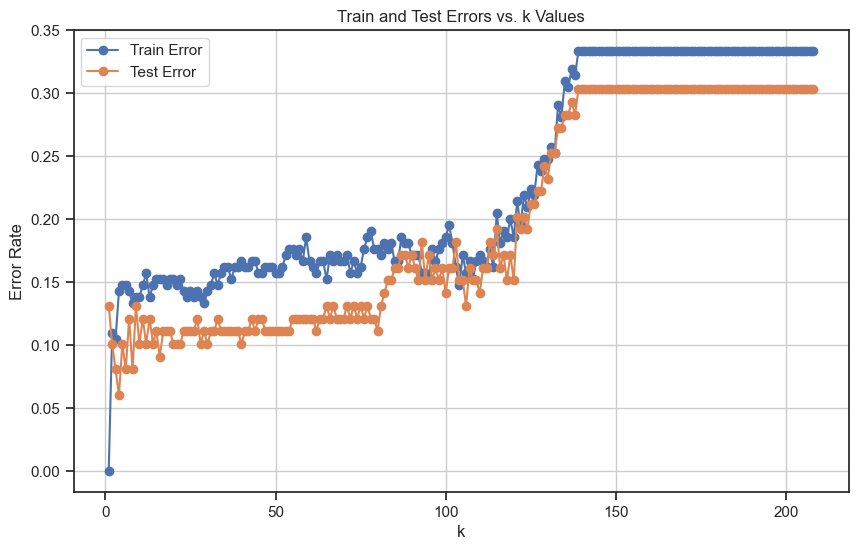

In [134]:
k_values = np.arange(208, 0, -1)

train_errors = []
test_errors = []

best_k_star = None
best_test_error = float('inf')
best_confusion_matrix = None
best_precision = None
best_recall = None
best_f1_score = None

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)
    
    train_error = 1 - np.mean(y_train_pred == y_train)
    test_error = 1 - np.mean(y_test_pred == y_test)
    
    train_errors.append(train_error)
    test_errors.append(test_error)
    
    if test_error < best_test_error:
        best_k_star = k
        best_test_error = test_error
        best_confusion_matrix = confusion_matrix(y_test, y_test_pred)
        best_precision = precision_score(y_test, y_test_pred)
        best_recall = recall_score(y_test, y_test_pred)
        best_f1_score = f1_score(y_test, y_test_pred)

plt.figure(figsize=(10, 6))
plt.plot(k_values, train_errors, label='Train Error', marker='o')
plt.plot(k_values, test_errors, label='Test Error', marker='o')
plt.xlabel('k')
plt.ylabel('Error Rate')
plt.title('Train and Test Errors vs. k Values')
plt.legend()
plt.grid(True)

# Print the most suitable k (k*) and evaluation metrics
print("Best k*:", best_k_star)
print("Best Test Error:", best_test_error)
print("Confusion Matrix:")
print(best_confusion_matrix)
print("Precision:", best_precision)
print("Recall:", best_recall)
print("F1 Score:", best_f1_score)

# Show the plot
plt.show()


#### iii. Learning Curve

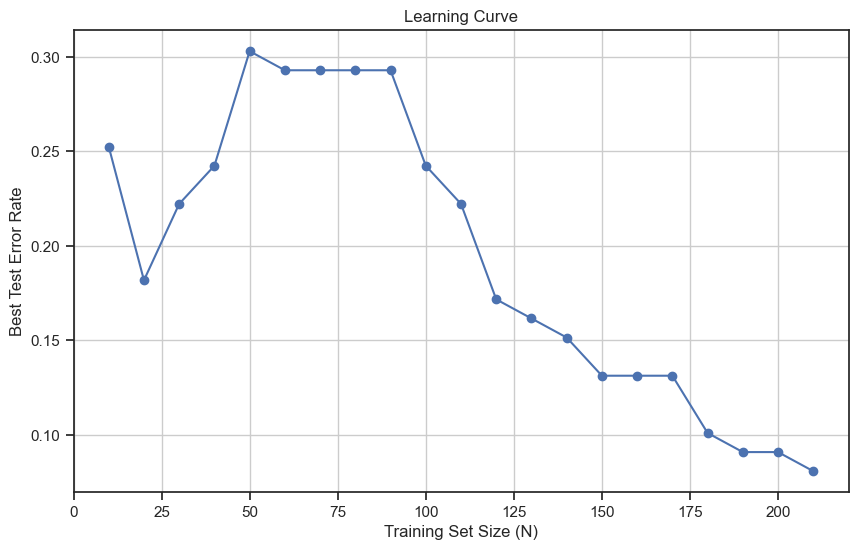

In [135]:
N_values = list(range(10, 211, 10))  
best_test_errors = []  

for N in N_values:
    b = N // 3
    class_0_subset = class_0_data.head(b)
    class_1_subset = class_1_data.head(N - b)
    training_subset = pd.concat([class_0_subset, class_1_subset])

    best_k = None
    best_test_error = float('inf')  # Initialize with a high value

    k_values = list(range(1, N, 5))

    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
        knn.fit(training_subset.drop(columns='Class', axis=1), training_subset['Class'])
        
        test_error = 1 - knn.score(X_test, y_test)

        if test_error < best_test_error:
            best_k = k
            best_test_error = test_error

    best_test_errors.append(best_test_error)

plt.figure(figsize=(10, 6))
plt.plot(N_values, best_test_errors, marker='o')
plt.xlabel('Training Set Size (N)')
plt.ylabel('Best Test Error Rate')
plt.title('Learning Curve')
plt.grid(True)
plt.show()






### (d) Other Metrics

#### i. Minkowski Distance.



##### A. Manhattan Distance with p = 1.

In [136]:
training_errors_manhattan = []
test_errors_manhattan = []

for k in range(1, 197, 5):
    knn_manhattan = KNeighborsClassifier(n_neighbors=k, p=1)  # Use p=1 for Manhattan distance
    knn_manhattan.fit(X_train, y_train)
    
    training_error = 1 - knn_manhattan.score(X_train, y_train)
    
    test_error = 1 - knn_manhattan.score(X_test, y_test)
    
    training_errors_manhattan.append(training_error)
    test_errors_manhattan.append(test_error)

best_k_manhattan = (np.argmin(test_errors_manhattan) * 5) + 1  # Convert index to k value

min_test_error_manhattan = min(test_errors_manhattan)

print("Best k for Manhattan Distance:", best_k_manhattan)
print("Test Error for Manhattan Distance (Best k):", min_test_error_manhattan)
print("Training Error for Manhattan Distance (Best k):", training_errors_manhattan[np.argmin(test_errors_manhattan)])



Best k for Manhattan Distance: 6
Test Error for Manhattan Distance (Best k): 0.11111111111111116
Training Error for Manhattan Distance (Best k): 0.1428571428571429


##### B. With log10(p) in {0.1, 0.2, 0.3, ... ,1}.


In [137]:
test_errors_minkowski = []
training_errors_minkowski = []
best_k_minkowski = None
best_log10_p_minkowski = None
best_test_error_minkowski = float('inf')

log10_p_values = np.arange(0.1, 1.0, 0.1)

k_values = np.arange(1, 197, 5)

for log10_p in log10_p_values:
    p = 10 ** log10_p  
    
    for k in k_values:
        knn_minkowski = KNeighborsClassifier(n_neighbors=k, p=p)
        knn_minkowski.fit(X_train, y_train)
    
        training_error = 1 - knn_minkowski.score(X_train, y_train)
        
        test_error = 1 - knn_minkowski.score(X_test, y_test)
    
        training_errors_minkowski.append(training_error)
        test_errors_minkowski.append(test_error)
    
        if test_error < best_test_error_minkowski:
            best_k_minkowski = k
            best_log10_p_minkowski = log10_p
            best_test_error_minkowski = test_error

best_training_error_minkowski = training_errors_minkowski[(best_k_minkowski - 1) // 5]

print("Best k Minkowski:", best_k_minkowski)
print("Best log10(p) for Minkowski Distance:", best_log10_p_minkowski)
print("Best Test Error for Minkowski Distance:", best_test_error_minkowski)
print("Training Error for Minkowski Distance (Best k):", best_training_error_minkowski)





Best k Minkowski: 6
Best log10(p) for Minkowski Distance: 0.6
Best Test Error for Minkowski Distance: 0.06060606060606055
Training Error for Minkowski Distance (Best k): 0.13809523809523805


##### C. Chebyshev Distance With p -> infinity.

In [138]:
best_test_error_chebyshev = float('inf')
best_k_chebyshev = None
best_training_error_chebyshev = None

training_errors_chebyshev = []
test_errors_chebyshev = []

for k in range(1, 197, 5):
    knn_chebyshev = KNeighborsClassifier(n_neighbors=k, p=float('inf'))
    
    knn_chebyshev.fit(X_train, y_train)
    
    training_error_chebyshev = 1 - knn_chebyshev.score(X_train, y_train)
    
    test_error_chebyshev = 1 - knn_chebyshev.score(X_test, y_test)
    
    training_errors_chebyshev.append(training_error_chebyshev)
    test_errors_chebyshev.append(test_error_chebyshev)
    
    if test_error_chebyshev < best_test_error_chebyshev:
        best_test_error_chebyshev = test_error_chebyshev
        best_k_chebyshev = k
        best_training_error_chebyshev = training_error_chebyshev

print("Best Test Error (Chebyshev, p=inf):", best_test_error_chebyshev)
print("Best k (Chebyshev, p=inf):", best_k_chebyshev)
print("Training Error for Chebyshev Distance (Best k):", best_training_error_chebyshev)




Best Test Error (Chebyshev, p=inf): 0.08080808080808077
Best k (Chebyshev, p=inf): 16
Training Error for Chebyshev Distance (Best k): 0.14761904761904765


#### ii. Mahalanobis Distance.

In [139]:
best_test_error_mahalanobis = float('inf')
best_k_mahalanobis = None
best_V_mahalanobis = None
best_training_error_mahalanobis = float('inf')

k_values = np.arange(1, 197, 5)

training_errors_mahalanobis = []
test_errors_mahalanobis = []

for k in k_values:
    for V in [np.linalg.inv(np.cov(X_train, rowvar=False)), np.linalg.inv(np.cov(X_train.T))]:
        mahalanobis_metric = DistanceMetric.get_metric('mahalanobis', V=V)
        mahalanobis_distances_train = mahalanobis_metric.pairwise(X_train, X_train)
        mahalanobis_distances_test = mahalanobis_metric.pairwise(X_test, X_train)

        nearest_neighbor_indices_train = np.argpartition(mahalanobis_distances_train, k)[:, :k]
        nearest_neighbor_indices_test = np.argpartition(mahalanobis_distances_test, k)[:, :k]

        nearest_neighbor_indices_train_1d = nearest_neighbor_indices_train.reshape(-1)
        nearest_neighbor_indices_test_1d = nearest_neighbor_indices_test.reshape(-1)

        nearest_neighbor_labels_train = np.array(y_train)[nearest_neighbor_indices_train_1d]
        nearest_neighbor_labels_test = np.array(y_train)[nearest_neighbor_indices_test_1d]

        y_pred_mahalanobis_train = []
        y_pred_mahalanobis_test = []

        for i in range(len(X_train)):
            unique, counts = np.unique(nearest_neighbor_labels_train[i * k:(i + 1) * k], return_counts=True)
            majority_label = unique[np.argmax(counts)]
            y_pred_mahalanobis_train.append(majority_label)

        for i in range(len(X_test)):
            unique, counts = np.unique(nearest_neighbor_labels_test[i * k:(i + 1) * k], return_counts=True)
            majority_label = unique[np.argmax(counts)]
            y_pred_mahalanobis_test.append(majority_label)

        training_error_mahalanobis = 1 - np.mean(np.array(y_pred_mahalanobis_train) == y_train)
        test_error_mahalanobis = 1 - np.mean(np.array(y_pred_mahalanobis_test) == y_test)

        training_errors_mahalanobis.append(training_error_mahalanobis)
        test_errors_mahalanobis.append(test_error_mahalanobis)

        if test_error_mahalanobis < best_test_error_mahalanobis:
            best_k_mahalanobis = k
            best_V_mahalanobis = V
            best_test_error_mahalanobis = test_error_mahalanobis
            best_training_error_mahalanobis = training_error_mahalanobis

print("Best k for Mahalanobis Distance:", best_k_mahalanobis)
print("Best Test Error for Mahalanobis Distance:", best_test_error_mahalanobis)
print("Training Error for Mahalanobis Distance (Best k):", best_training_error_mahalanobis)


/Users/zachary/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_distance_metric.py:10: FutureWarning: sklearn.neighbors.DistanceMetric has been moved to sklearn.metrics.DistanceMetric in 1.0. This import path will be removed in 1.3
  warnings.warn(


Best k for Mahalanobis Distance: 6
Best Test Error for Mahalanobis Distance: 0.07070707070707072
Training Error for Mahalanobis Distance (Best k): 0.1333333333333333


### (e) Weighted Decision

In [140]:
best_test_error_euclidean = float('inf')
best_k_euclidean = None
best_test_error_manhattan = float('inf')
best_k_manhattan = None
best_test_error_chebyshev = float('inf')
best_k_chebyshev = None

for k in range(1, 197, 5):
    knn_euclidean = KNeighborsClassifier(n_neighbors=k, metric='euclidean', weights='distance')
    knn_manhattan = KNeighborsClassifier(n_neighbors=k, metric='manhattan', weights='distance')
    knn_chebyshev = KNeighborsClassifier(n_neighbors=k, metric='chebyshev', weights='distance')
    
    knn_euclidean.fit(X_train, y_train)
    knn_manhattan.fit(X_train, y_train)
    knn_chebyshev.fit(X_train, y_train)
    
    y_pred_euclidean = knn_euclidean.predict(X_test)
    y_pred_manhattan = knn_manhattan.predict(X_test)
    y_pred_chebyshev = knn_chebyshev.predict(X_test)
    
    test_error_euclidean = 1 - np.mean(y_pred_euclidean == y_test)
    test_error_manhattan = 1 - np.mean(y_pred_manhattan == y_test)
    test_error_chebyshev = 1 - np.mean(y_pred_chebyshev == y_test)
    
    if test_error_euclidean < best_test_error_euclidean:
        best_test_error_euclidean = test_error_euclidean
        best_k_euclidean = k
    
    if test_error_manhattan < best_test_error_manhattan:
        best_test_error_manhattan = test_error_manhattan
        best_k_manhattan = k
    
    if test_error_chebyshev < best_test_error_chebyshev:
        best_test_error_chebyshev = test_error_chebyshev
        best_k_chebyshev = k

print("Best Test Error (Euclidean):", best_test_error_euclidean)
print("Best k (Euclidean):", best_k_euclidean)
print("Best Test Error (Manhattan):", best_test_error_manhattan)
print("Best k (Manhattan):", best_k_manhattan)
print("Best Test Error (Chebyshev):", best_test_error_chebyshev)
print("Best k (Chebyshev):", best_k_chebyshev)


Best Test Error (Euclidean): 0.101010101010101
Best k (Euclidean): 6
Best Test Error (Manhattan): 0.101010101010101
Best k (Manhattan): 6
Best Test Error (Chebyshev): 0.11111111111111116
Best k (Chebyshev): 16


### (f) Training Error Rate

| Method  | Test error   | Best *k*   | Training Error   |
|---|---|---|---|
| Manhattan Distance with p = 1.  | 0.11111111111111116  |  6 | 0.1428571428571429  |
| With log10(p) in {0.1, 0.2, 0.3, ... ,1}.  | 0.06060606060606055  | 6  | 0.13809523809523805  |
|Chebyshev Distance With p -> infinity.| 0.08080808080808077  |  16 |  0.14761904761904765 |
| Mahalanobis Distance  | 0.07070707070707072  | 6  |  0.1333333333333333 |
| Euclidean  |  0.101010101010101 | 6  |   |
|  Manhattan |  0.101010101010101 |  6 |   |
| Chebyshev  |  0.11111111111111116 | 16  |   |

The best training error observed was with the Minkowski Distance with Log10(p) at Minkowski Distance: 0.6, this yields a training error of 0.113809523809523805